In [1]:
from tensorflow.keras.datasets import mnist

In [5]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [9]:
x_test.dtype

dtype('uint8')

In [11]:
import matplotlib.pyplot as plt


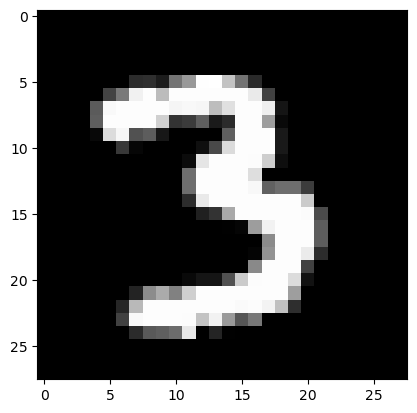

In [13]:
plt.imshow(x_test[500]/255, cmap=plt.cm.gray)

# TwoLayerNet in Keras

In [16]:
from tensorflow import keras

In [18]:
model = keras.Sequential([
    keras.layers.Dense(100, activation="sigmoid", input_shape=(784, )),
    keras.layers.Dense(10, activation="softmax")
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [22]:
from tensorflow.keras.datasets import mnist

In [24]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [26]:
x_train[0].shape

(28, 28)

In [28]:
x_test.shape

(10000, 28, 28)

In [30]:
keras.utils.to_categorical(y_train, num_classes=10)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## Preprocess datasets

In [35]:
# Reshape 28x28 to 784
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [37]:
x_train.shape

(60000, 784)

In [39]:
# Normalize values to 0 .. 1
x_train = x_train/255.0
x_test = x_test/255.0

In [41]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test =  keras.utils.to_categorical(y_test, num_classes=10)

In [43]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [45]:
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 302us/step - accuracy: 0.5318 - loss: 1.8577
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 317us/step - accuracy: 0.8325 - loss: 0.8110
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 320us/step - accuracy: 0.8675 - loss: 0.5630
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 331us/step - accuracy: 0.8812 - loss: 0.4709
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 313us/step - accuracy: 0.8873 - loss: 0.4254
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 313us/step - accuracy: 0.8960 - loss: 0.3887
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 309us/step - accuracy: 0.8998 - loss: 0.3663
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 316us/step - accuracy: 0.9029 - loss: 0.3466
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 325us/step - accuracy: 0.9056 - loss: 0.3380
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 313us/step - accuracy: 0.9059 - loss: 0.3315
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 309us/step - accuracy: 0.9099 - loss: 0.3151
Epoch 12

In [47]:
predictions = model.predict(x_test[0:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [49]:
import numpy as np

In [51]:
predictions = np.argmax(predictions, axis=1)

In [53]:
predictions

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [55]:
labels = np.argmax(y_test[0:10], axis=1)

In [57]:
labels

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [59]:
predictions == labels

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True])

# LeNet in Keras


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [64]:
class LeNet:
    def __init__(self, batch_size=32, epochs=20):
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None
        self._create_lenet()
        self._compile()
    

    def _create_lenet(self):
        self.model = Sequential([
            Conv2D(filters=6, kernel_size=(5,5), 
                   activation='sigmoid', input_shape=(28, 28, 1), 
                   padding='same'),
            AveragePooling2D(pool_size=(2, 2), strides=2),
            
            Conv2D(filters=16, kernel_size=(5,5), 
                   activation='sigmoid', 
                   padding='same'),
            AveragePooling2D(pool_size=(2, 2), strides=2),

            Flatten(),

            Dense(120, activation='sigmoid'),
            Dense(84, activation='sigmoid'),
            Dense(10, activation='softmax')
        ])

    def _compile(self):
        if self.model is None:
            print('Error: Create a model first..')
        
        self.model.compile(optimizer='Adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])
        

    def _preprocess(self):
        # load mnist data
        (x_train, y_train), (x_test, y_test) = mnist.load_data()

        # normalize
        x_train = x_train/255.0
        x_test = x_test/255.0

        # add channel dim
        self.x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  
        self.x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)  

        # one-hot encoding
        self.y_train = to_categorical(y_train, 10)
        self.y_test = to_categorical(y_test, 10)

    def train(self):
        self._preprocess()
        self.model.fit(self.x_train, self.y_train, 
                  batch_size=self.batch_size, 
                  epochs=self.epochs)

In [66]:
lenet = LeNet(batch_size=64, epochs=10)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:

lenet.train()

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3859 - loss: 1.7296
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9137 - loss: 0.2876
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9454 - loss: 0.1798
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9588 - loss: 0.1368
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9681 - loss: 0.1051
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9754 - loss: 0.0818
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9789 - loss: 0.0694
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9807 - loss: 0.0617
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9829 - loss: 0.0552
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9853 - loss: 0.0497


In [72]:
predictions = np.argmax(lenet.model.predict(lenet.x_test[0:10]), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [74]:
print(predictions)

[7 2 1 0 4 1 4 9 5 9]


In [78]:
labels = np.argmax(lenet.y_test[0:10], axis=1)

In [80]:
print(labels)

[7 2 1 0 4 1 4 9 5 9]


In [82]:
print(predictions == labels)

[ True  True  True  True  True  True  True  True  True  True]
